In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
data=pd.read_csv("Data_Train.csv")

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

In [ ]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#creating list of catregory columns
category=['Airline','Source','Destination','Additional_Info']
category

['Airline', 'Source', 'Destination', 'Additional_Info']

In [ ]:
from pandas.tseries.frequencies import unique
for i in category:
  print(i,data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [ ]:
catergory_cols=data.select_dtypes(include=['object']).columns
catergory_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

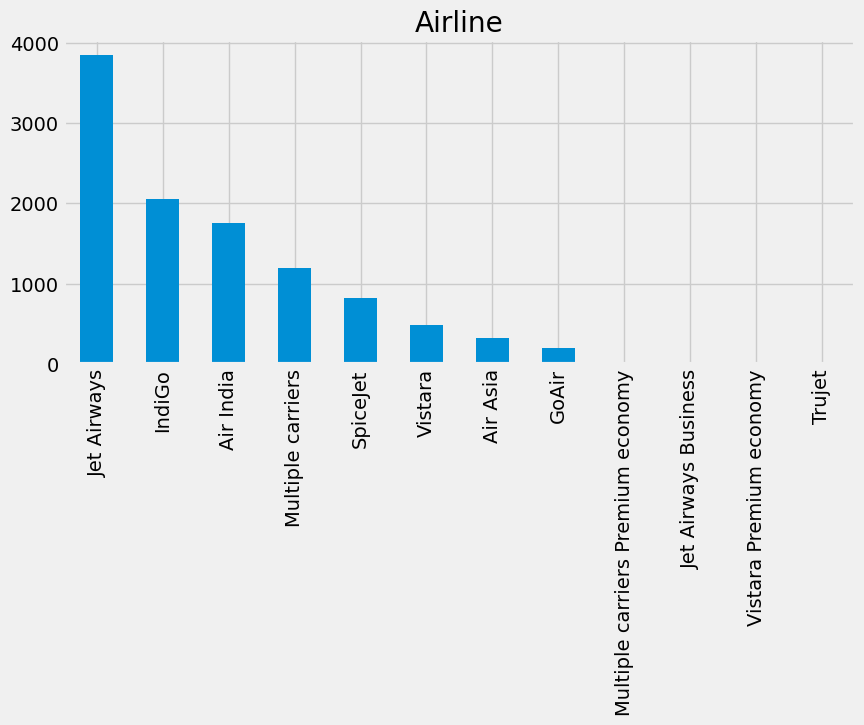

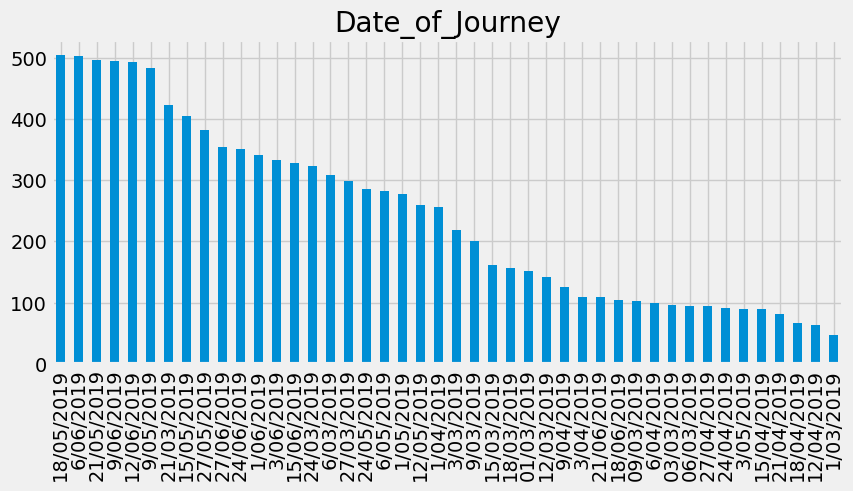

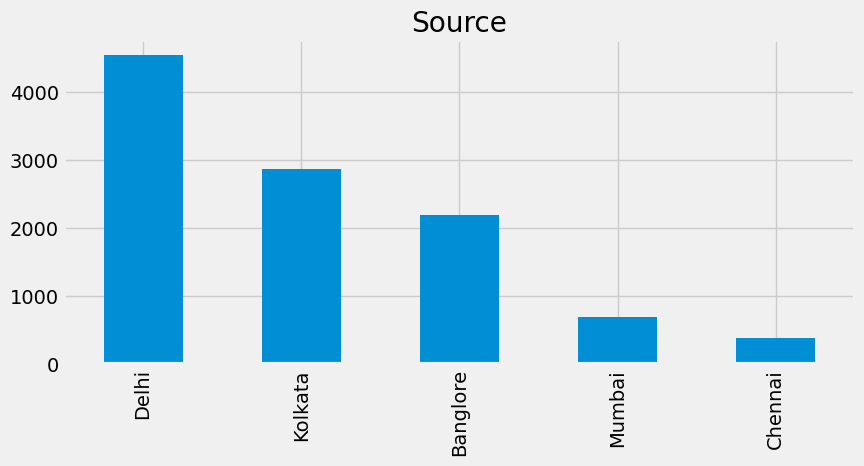

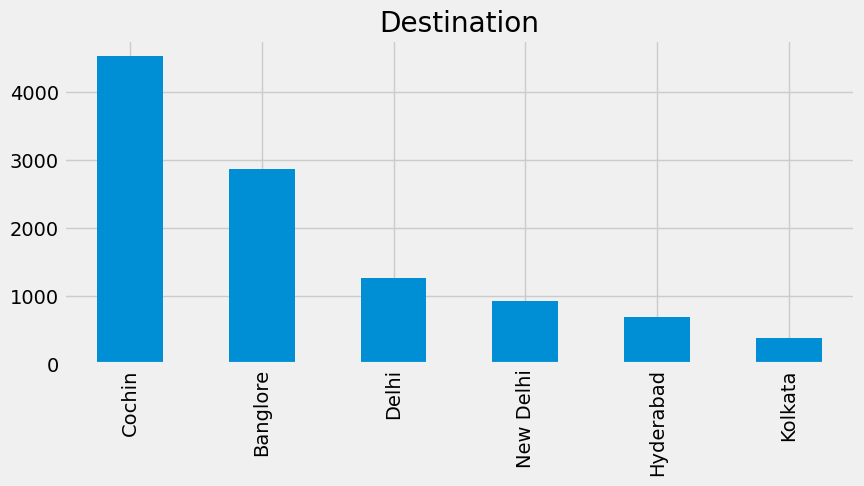

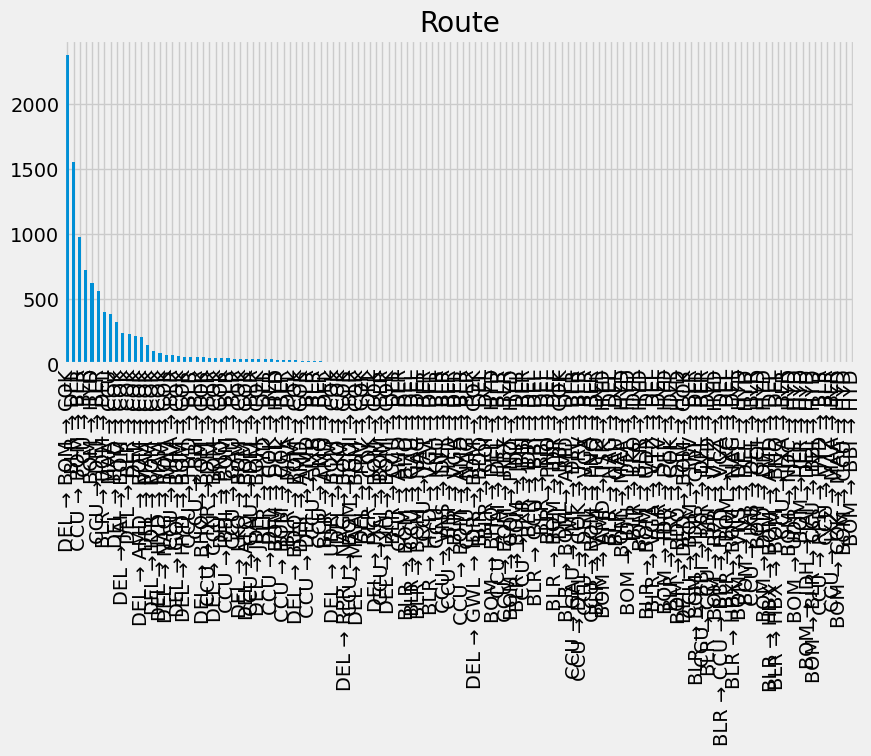

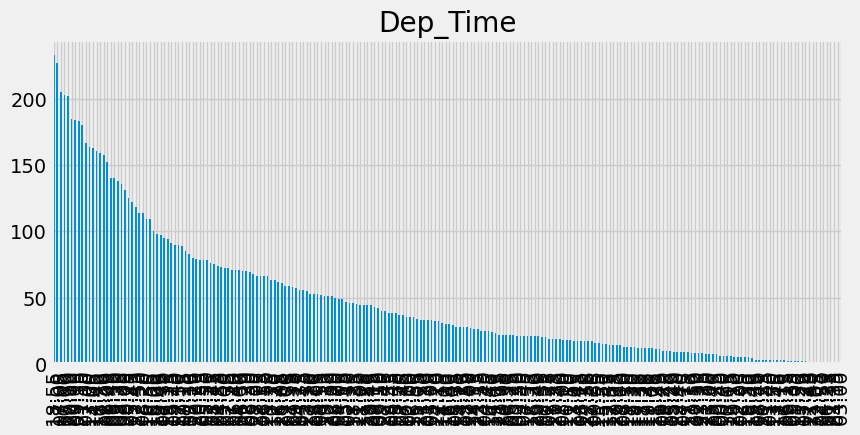

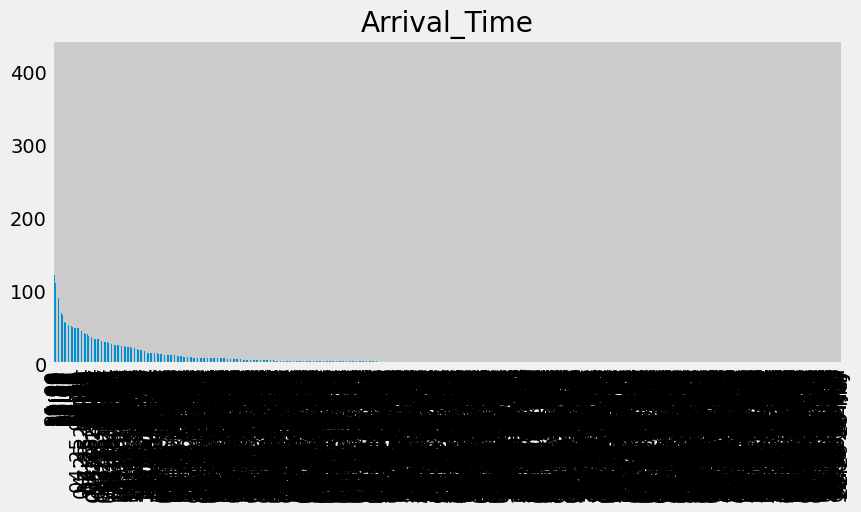

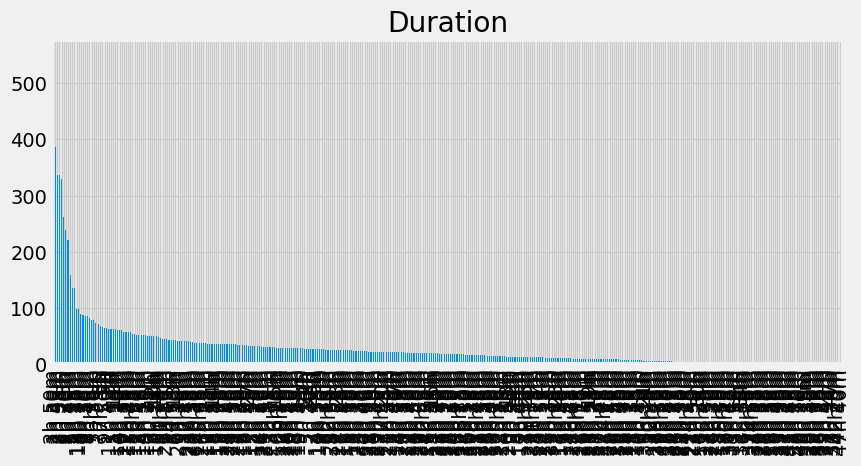

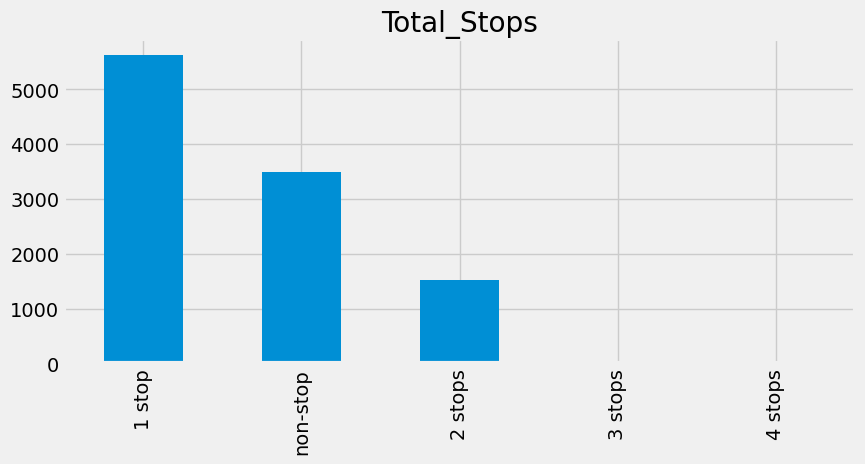

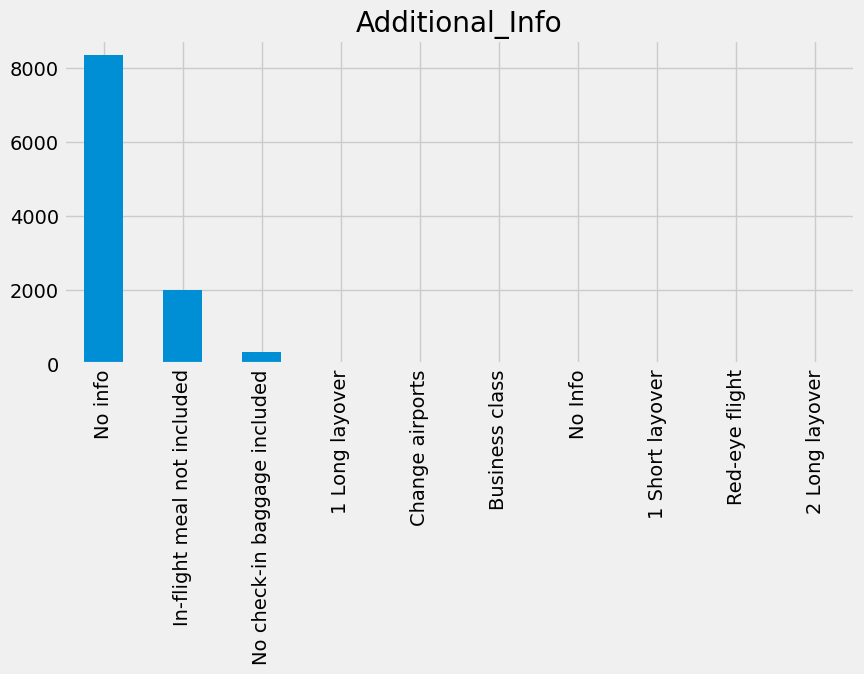

In [ ]:
for column in catergory_cols:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  data[column].value_counts().plot(kind='bar')
  plt.title (column)


In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10682, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split('')

In [ ]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration.str.split(' ')

In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data['Travel_Mins']=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]


In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]


In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration             10682
Total_Stops              0
Additional_Info          0
Price                    0
City1                    0
City2                10682
City3                10682
City4                10682
City5                10682
City6                10682
date                     0
month                    0
year                     0
Dep_Time_Hour            0
Dep_Time_mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10682
dtype: int64

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [ ]:
data.drop(['Date_of_journey','Route','Dep_time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
City1              1
City2              1
City3              1
City4              1
City5              1
City6              1
dtype: int64

In [ ]:
data['City1'].fillna('None',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
#data.Dep_Time_mins=data.Dep_Time_mins.astype('int64')
#data.Arrival_Date=data.Arrival_Date.astype('int64')
#data.head()

In [ ]:
data[data['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,City1,City2,City3,City4,City5,City6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,C,C,U,,→,
10,Air India,"[1, 06, 2019]",Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1,No info,8907,D,E,L,,→,
12,Air India,"[24, 06, 2019]",Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667,M,A,A,,→,
15,Air India,"[3, 03, 2019]",Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2,No info,14011,D,E,L,,→,
18,Air India,"[12, 06, 2019]",Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2,No info,13381,D,E,L,,→,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,"[12, 05, 2019]",Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2,No info,11411,C,C,U,,→,
10671,Air India,"[6, 06, 2019]",Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100,B,O,M,,→,
10675,Air India,"[9, 06, 2019]",Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,B,O,M,,→,
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,C,C,U,,→,


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [ ]:
from pandas.core.arrays import categorical
categorical=['Additional_Info','Airline','Source','Destination','city1']
numerical=['Total_stop','Date','Month','Year','Dep_Time_Hours','Dep_Time_mins','Arrival_Time_Hours','Arrival_Time_Mins',
          'Arrival_date','Travel_Hours','Travel_Mins']

In [ ]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))


<Figure size 2000x4500 with 0 Axes>

<Figure size 2000x4500 with 0 Axes>

In [3]:
#for i in categorical:
  #plt.subplot(6,3,c)

  
  #plt.xticks(rotaion=90)
  #plt.tight_layout(pad=3.0)
  #c=c+1
  

In [ ]:
plt.show()

<ipython-input-48-102ce9297ea4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

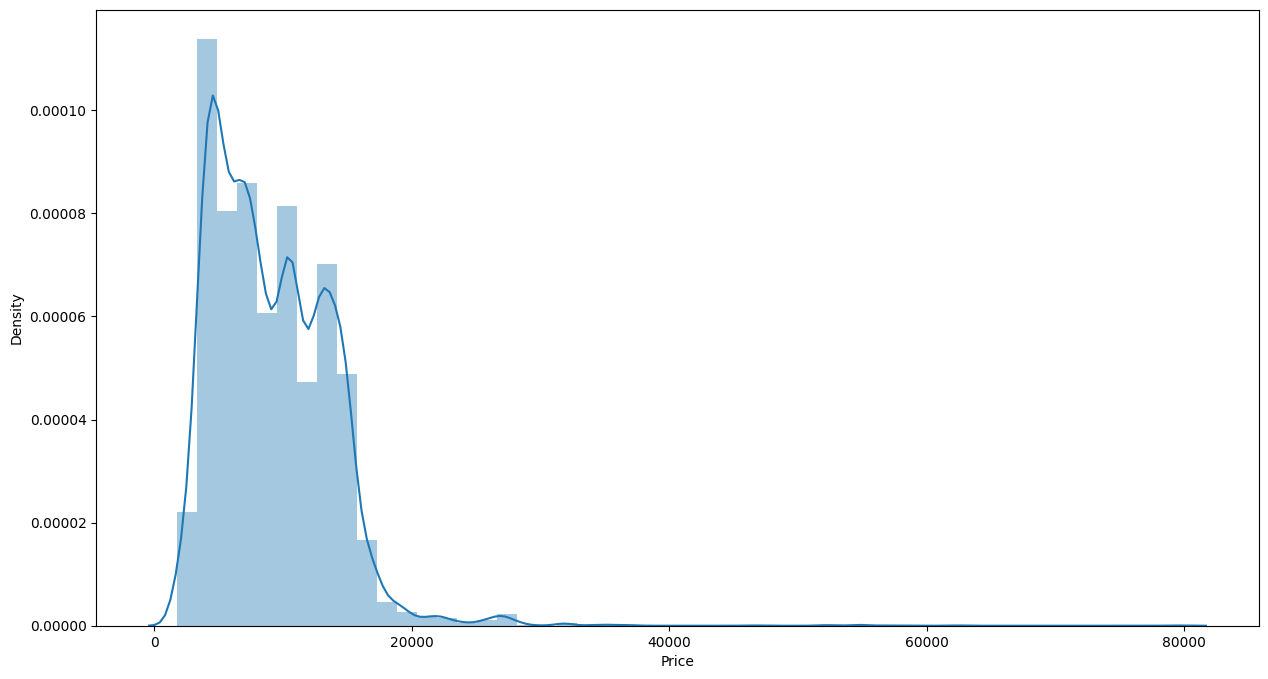

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<ipython-input-50-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

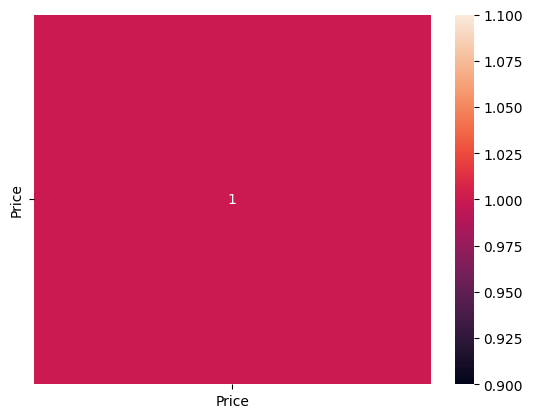

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

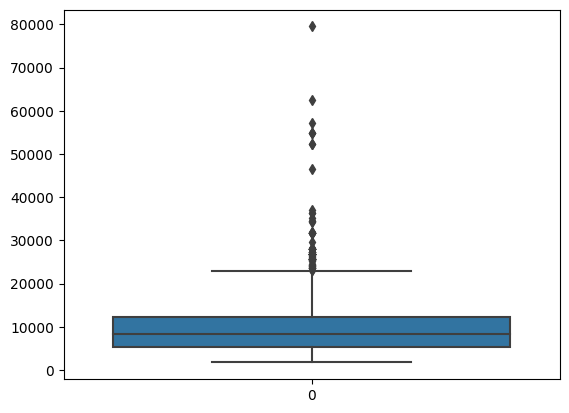

In [ ]:
#Detecting the outliers
import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [ ]:
### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler

In [ ]:
x_Scaled=ss.fit_transform

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<ipython-input-31-102ce9297ea4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

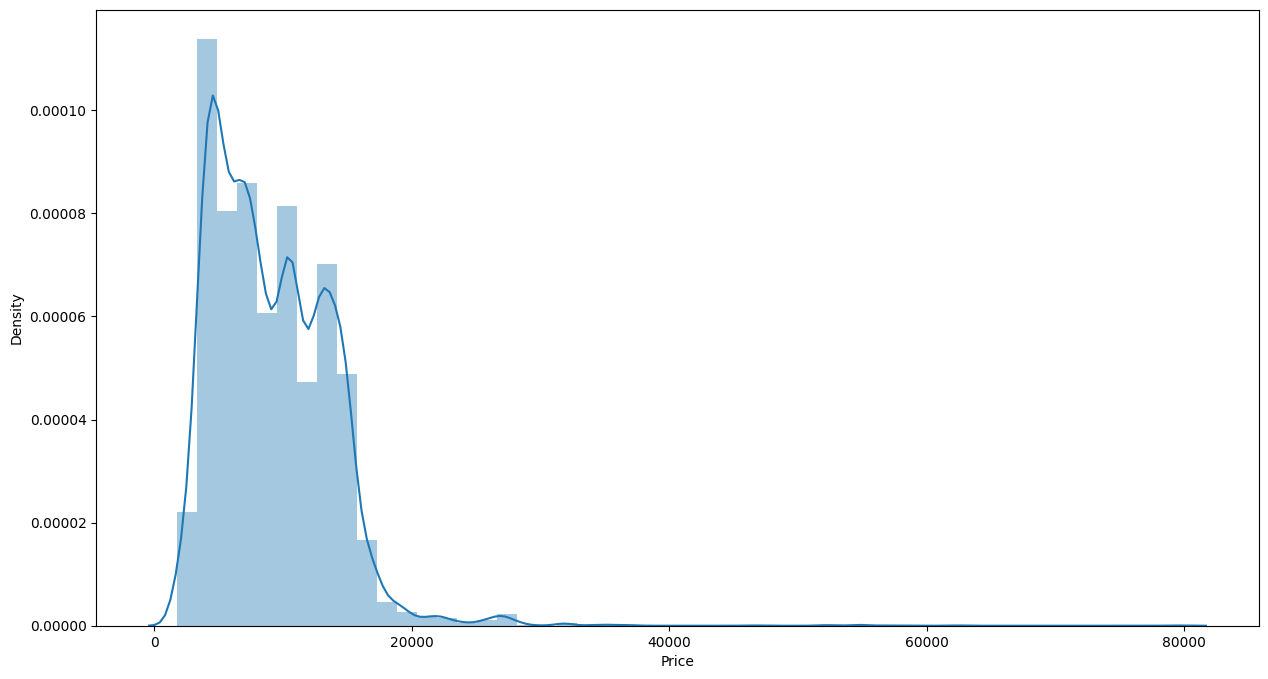

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price'],
      dtype='object')

In [ ]:
data=pd.read_csv("optimizing+flight+booking+decision+price+prediction+(1).csv")

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2,random_state=42)

In [ ]:
#X_train.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor ()
ad=AdaBoostRegressor ()

In [ ]:
from sklearn.metrics import r2_Score,mean_absolute_error,mean_squared_error

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
from pandas.core.arrays.datetimes import dtl
Knn=KNeighborsRegressor()
svr=SVR()
#dt=DecisionTreeRegressor()

In [ ]:
#for i in [Knn,svr,dt]:
i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i,predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)
    print('R2 score is',r2_score(y_test,y_pred))
    print('R2 score for train data',r2_score(y_train,i.predict(x_train)))
    print('Mens squared Error is',mean_absolute_error(y_test,y_pred) )
    print('Mean squared Error is',mean_squared_error(y_test,y_pred))
    print('RoottMean Squared Error is',( mean_squared_error(y_test,y_pred,squarad=False)))

IndentationError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

In [4]:
#from numpy.core.numeric import cross
#for i in range(2,5):
  #cv = cross_val_score(rfr,x_df,y_df,cv=i)
  #print(rfr,cv.mean())

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV 

In [5]:
#param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}

In [ ]:
#rfr=RandomForestRegressor()
#rfr.fil(x_train,y_train)

In [8]:
#gb=GradientBoostingRegressor()
#gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
#gb_res.fil(x_train,y_train)

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_train_pred=rfr.predict(x_test)
print("train accuracy",r2_Score(y_train_pred,y_train))
print("tets accuracy",r2_score(y_test,y_pred,y_test))

NameError: ignored

In [ ]:
data[data.Price>50000]
data.head()
pd.set_option('display.max_column',25)
data.head()

NameError: ignored

In [ ]:
import numpy as np



In [ ]:
from matplotlib import pyplot as plt

In [ ]:
ys = 200 + np.random.randn(100)
x=[x for x in range(len(ys))]


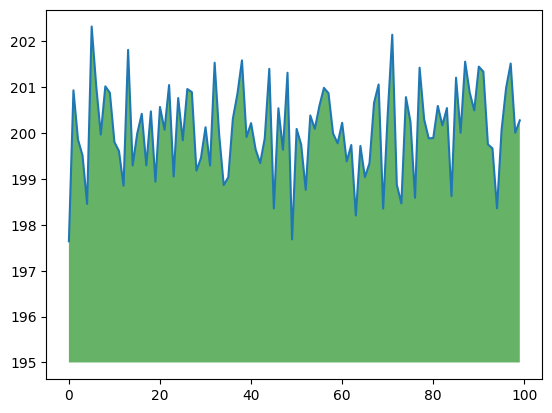

In [ ]:
plt.plot(x,ys,'-')
plt.fill_between(x,ys,195,where=(ys>195),facecolor='g',alpha=0.6)

In [ ]:
Knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
#Knn.fit(x_train,y_train)
#y_train_pred=Knn.predict(x_train)
#y_test_pred=Knn.predict(x_test)

In [ ]:
#print("train accuacy",r2_score(y_train_pred,y_train))
#print("trst accuracy",r2_score(y_test_pred,y_test))

In [ ]:
#predicted_value= pd .DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
#predicted_value

In [ ]:
#Price_list

In [ ]:
from sklearn.metrics._plot.regression import PredictionErrorDisplay


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


KeyError: ignored

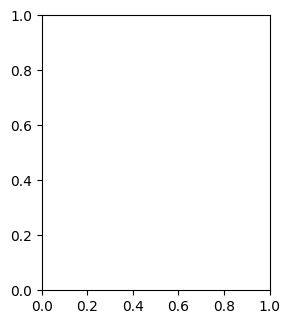

In [ ]:
c=1

for i in numerical:
  plt.figure(figsize=(10,25))
  plt.subplot(6,3,c)
  sns.scatterplot(x = data[i],y=data.price)
  plt.xticks(rotaion=90)
  #plt.tight_layout(pad=3.0)
  c=c+1
  
  plt.show()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,B,L,R,,→,
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,C,C,U,,→,
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,D,E,L,,→,
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,C,C,U,,→,
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,B,L,R,,→,


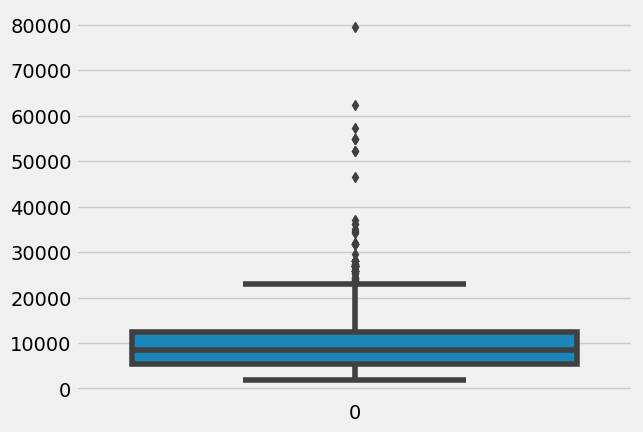

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])
data.head()

In [ ]:
#from sklearn.preprocessing import LableEncoder
#le=LableEncoder()

In [ ]:
#data.Airline=le.fit_transform(data.Airline)
#data.Source=le.fit_transform(data.Source)
#data.Destination=le.fit_transform(data.Destination)


#data.head()

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#data=data[['Airline','Source','Destination','Dep_Time_Hours','Dep_Time_Mins','Arrival_date','Price']]

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.describe()

,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [ ]:
#scalling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_Scaled=ss.fit_transform

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,B,L,R,,→,
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,C,C,U,,→,
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,D,E,L,,→,
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,C,C,U,,→,
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,B,L,R,,→,


In [ ]:
from sklearn.ensemble  import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,B,L,R,,→,
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,C,C,U,,→,
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,D,E,L,,→,
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,C,C,U,,→,
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,B,L,R,,→,


In [ ]:
from sklearn.metrics import RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor

In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))